<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/paper_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

1. Import compilation data
2. Coefficient of Correlation Data



## **Compilation**

In [17]:
!pip install catboost
!pip install shap

In [18]:
# Data handling
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# tqdm
from tqdm.auto import tqdm

# load google drive
from google.colab import drive

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# load dataset
datasetFlood = pd.read_csv('/content/drive/MyDrive/Kuliah S2/Semester 1/Artificial Intelligence/dataset/flood.csv')

datasetFlood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [21]:
datasetFlood

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,4,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,8,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,7,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,5,6,3,4,7,6,2,4,0,11,0.515


## **Coefficient of Correlation Data**

In [22]:
datasetFlood.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,0.002358,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,0.001328,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,0.006269,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,0.002312,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,0.001289,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,-0.005455,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,-0.001116,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,0.000667,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,0.003387,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,0.001461,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


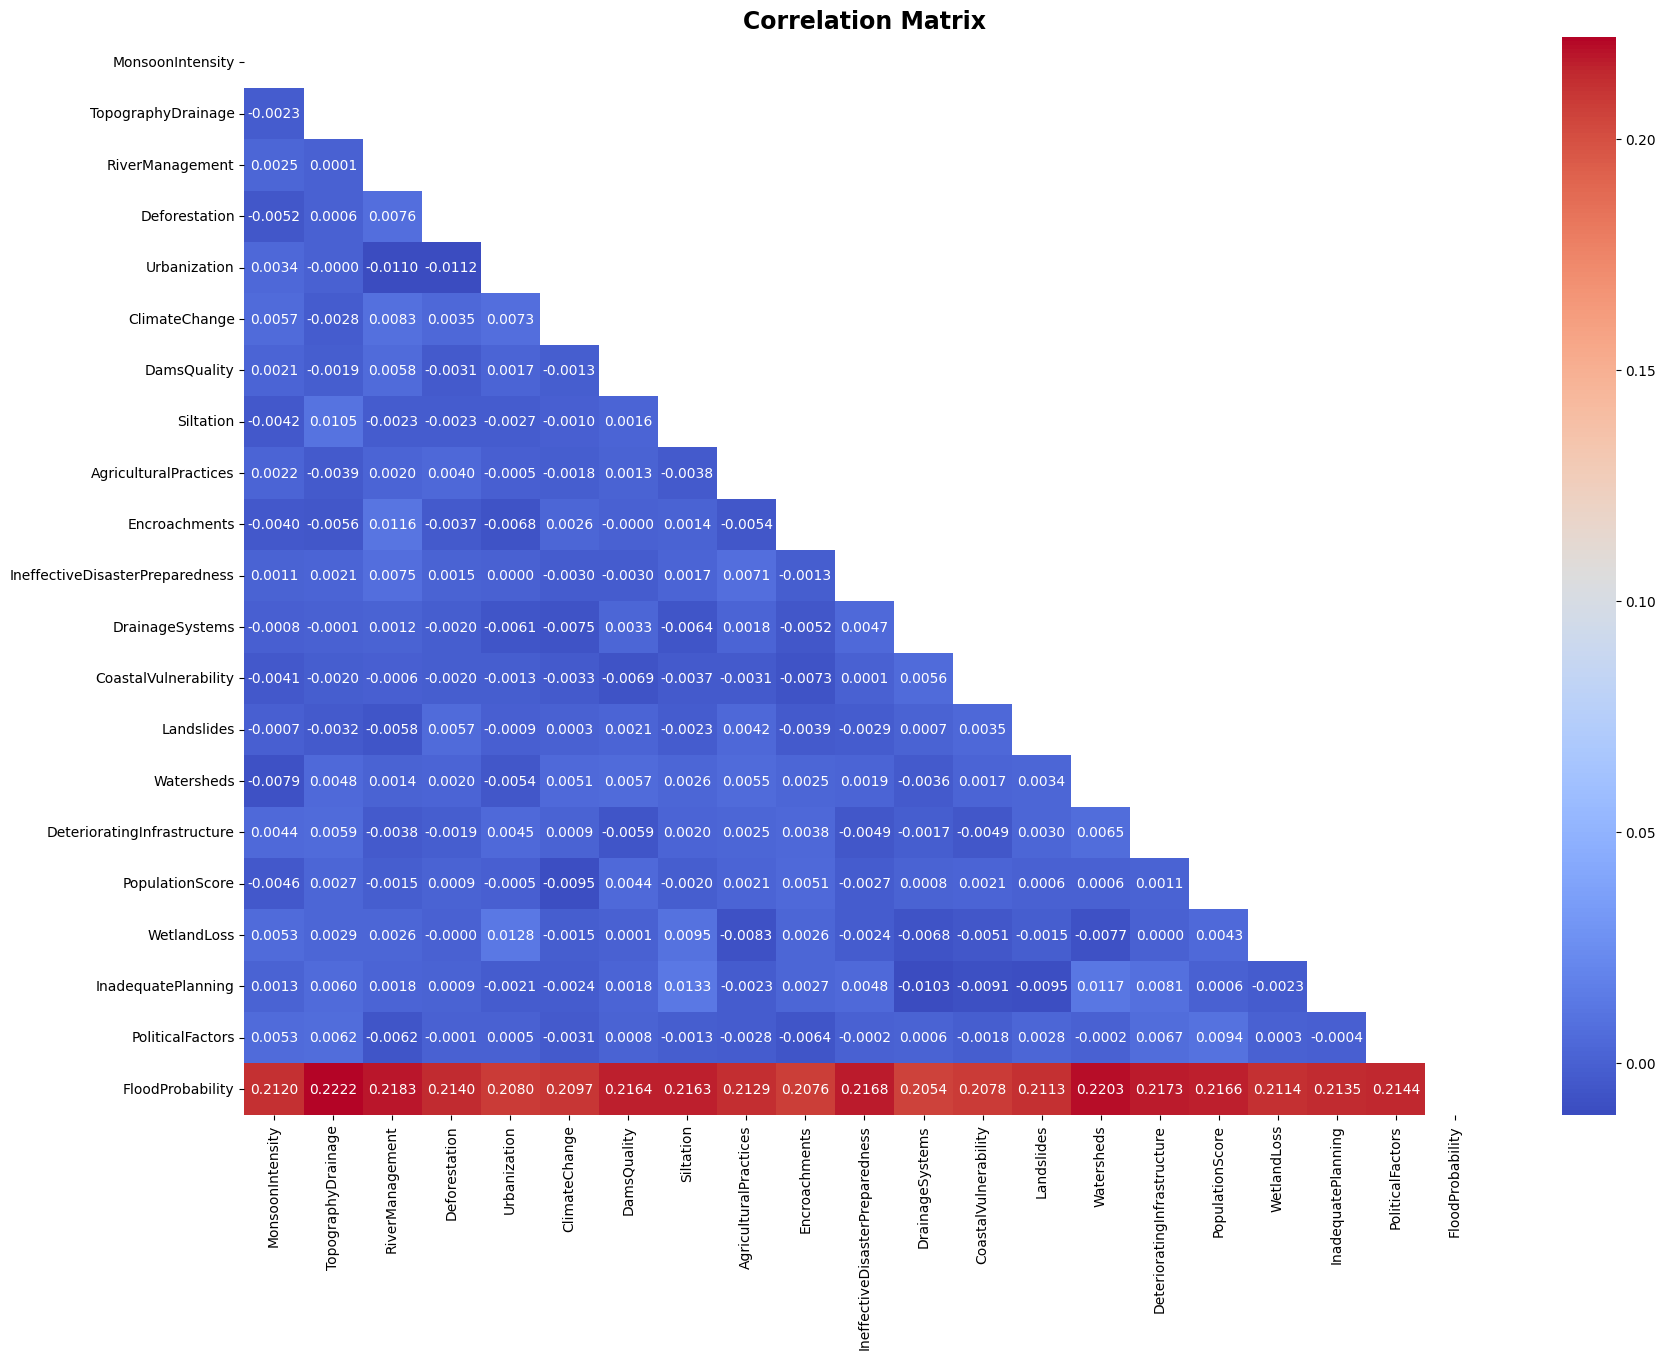

In [23]:
corr_matrix = datasetFlood.corr(method = "spearman")
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (20,14))
sns.heatmap(corr_matrix, cmap = "coolwarm", annot = True, fmt = ".4f", mask = mask, annot_kws = {'fontsize':10},ax = ax)
ax.set_title("Correlation Matrix", fontsize = 17, fontweight = "bold",color = "black")
fig.show()

# **Pre-processing**

In [24]:
X = datasetFlood.drop("FloodProbability", axis = 1)
y = datasetFlood["FloodProbability"]
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [25]:
binarizer = Binarizer(threshold = 0.5)

y_train_bin = binarizer.fit_transform(y_train.values.reshape(-1,1))
y_test_bin = binarizer.transform(y_test.values.reshape(-1,1))

# **Modeling**

## **Logistic Regression and Random Forest**

In [26]:
Algoritma = []

ACCURACY = []
MAE = []
MSE = []
RMSE = []
R2 = []
MAPE = []

In [27]:
dt = DecisionTreeClassifier(random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
nb = GaussianNB()

In [28]:
# Training !!!

MODELS = [dt, rf, nb]

accuracy_train = {}
accuracy_test = {}
y_pred = {}

for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train, y_train_bin)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    accuracy_train[name] = accuracy_score(y_train_bin.squeeze(), y_pred_train)
    accuracy_test[name] = accuracy_score(y_test_bin.squeeze(), y_pred_test)
    y_pred[name] = y_pred_test

    # evaluate
    result_ACCURACY = accuracy_score(y_test_bin.squeeze(), y_pred_test)
    result_MAE = mean_absolute_error(y_test_bin.squeeze(), y_pred_test)
    result_MSE = mean_squared_error(y_test_bin.squeeze(), y_pred_test)
    result_RMSE = mean_squared_error(y_test_bin.squeeze(), y_pred_test, squared=False)
    result_R2 = r2_score(y_test_bin.squeeze(), y_pred_test)
    result_MAPE = mean_absolute_percentage_error(y_test_bin.squeeze(), y_pred_test)

    Algoritma.append(name)
    ACCURACY.append(result_ACCURACY * 100)
    MAE.append(result_MAE)
    MSE.append(result_MSE)
    RMSE.append(result_RMSE)
    R2.append(result_R2)
    MAPE.append(result_MAPE)

    print(f"* {name} finished")

  0%|          | 0/3 [00:00<?, ?it/s]

* DecisionTreeClassifier finished


<ipython-input-28-909606551131>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train_bin)


* RandomForestClassifier finished
* GaussianNB finished


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Evaluation**

In [29]:
dict = {
  'Algorithm': Algoritma,
  'ACCURACY': ACCURACY,
  'MAE': MAE,
  'MSE': MSE,
  'RMSE': RMSE,
  # 'R2': R2,
  # 'MAPE': MAPE,
}
modelframeEvaluasi = pd.DataFrame(dict)
modelEvaluasi = modelframeEvaluasi.sort_values(['Algorithm'])
modelEvaluasi = modelframeEvaluasi
modelEvaluasi

,Algorithm,ACCURACY,MAE,MSE,RMSE
0,DecisionTreeClassifier,69.300000,0.307000,0.307000,0.554076
1,RandomForestClassifier,89.373333,0.106267,0.106267,0.325986
2,GaussianNB,91.426667,0.085733,0.085733,0.292803


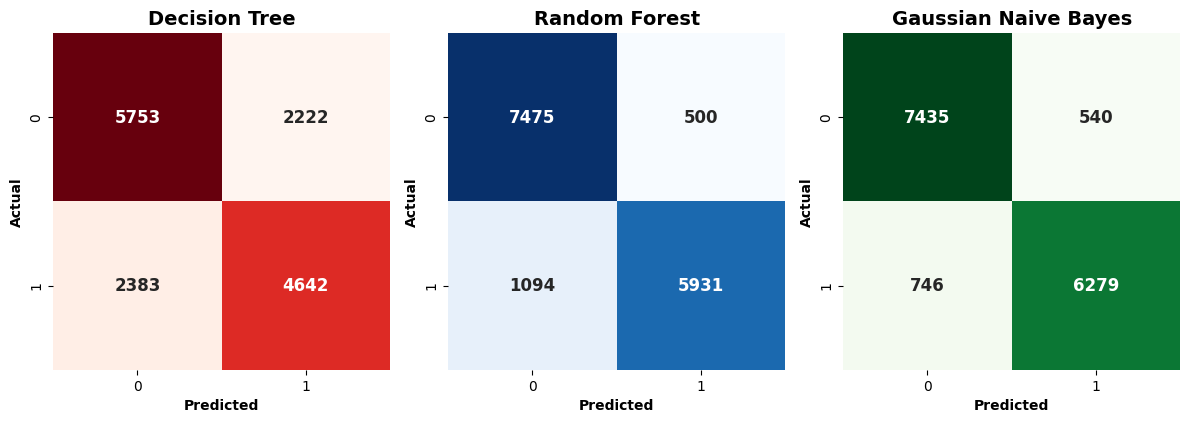

In [30]:
cm_DT = confusion_matrix(y_test_bin.squeeze(), y_pred['DecisionTreeClassifier'])
cm_RF = confusion_matrix(y_test_bin.squeeze(), y_pred['RandomForestClassifier'])
cm_NB = confusion_matrix(y_test_bin.squeeze(), y_pred['GaussianNB'])

fig,ax = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 5))
ax = ax.flat

sns.heatmap(cm_DT, cmap = "Reds", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[0])
ax[0].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_ylabel("Actual", fontsize = 10, fontweight = "bold", color = "black")
ax[0].set_title("Decision Tree", fontsize = 14, fontweight = "bold", color = "black")

sns.heatmap(cm_RF, cmap = "Blues", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[1])
ax[1].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_ylabel("Actual", fontsize = 10, fontweight = "bold", color = "black")
ax[1].set_title("Random Forest", fontsize = 14, fontweight = "bold", color = "black")

sns.heatmap(cm_NB, cmap = "Greens", annot = True, annot_kws = {'fontsize':12, 'fontweight':'bold'}, fmt = "", cbar = False, square = True, ax = ax[2])
ax[2].set_xlabel("Predicted", fontsize = 10, fontweight = "bold", color = "black")
ax[2].set_ylabel("Actual", fontsize = 10, fontweight = "bold", color = "black")
ax[2].set_title("Gaussian Naive Bayes", fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()